# Tesla stock price over time

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

In [30]:
stock = pd.read_csv('TESLAHistoricalQuotes.csv')
stock = stock.drop(0,0)

In [31]:
# Fix up the date column
stock.date = pd.to_datetime(stock.date)
stock = stock.sort_values('date')

In [32]:
stock.set_index(stock.date, inplace=True)
stock = stock.drop('date', 1)

In [33]:
stock['daily_gain'] = stock.close - stock.open

In [34]:
stock['daily_change'] = stock.daily_gain / stock.open

In [35]:
stock.head()

,close,volume,open,high,low,daily_gain,daily_change
date,,,,,,,
2010-06-29,23.89,18751150.0000,19.00,25.0000,17.54,4.89,0.257368
2010-06-30,23.83,17165210.0000,25.79,30.4192,23.30,-1.96,-0.075998
2010-07-01,21.96,8216789.0000,25.00,25.9200,20.27,-3.04,-0.121600
2010-07-02,19.20,5135795.0000,23.00,23.1000,18.71,-3.80,-0.165217
2010-07-06,16.11,6858092.0000,20.00,20.0000,15.83,-3.89,-0.194500


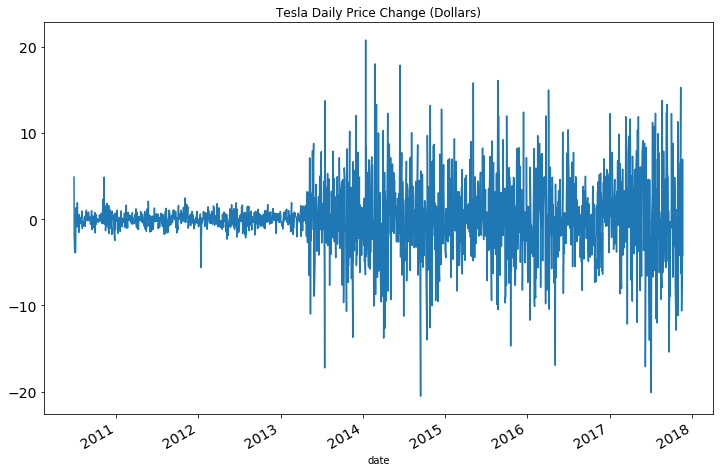

In [9]:
stock.daily_gain.plot(figsize=(12,8), title= 'Tesla Daily Price Change (Dollars)', fontsize=14)
plt.show()

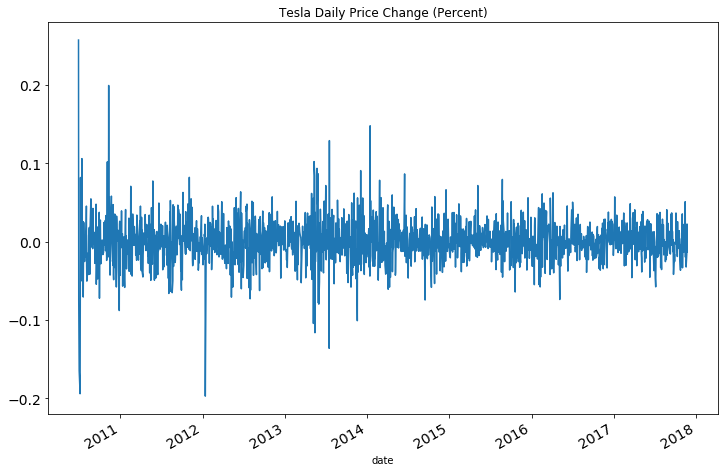

In [10]:
stock.daily_change.plot(figsize=(12,8), title= 'Tesla Daily Price Change (Percent)', fontsize=14)
plt.show()

These already should be much more stationary.

In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    # This can be fine tuned.  There is some relationship, but hard to quantify.
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  import sys


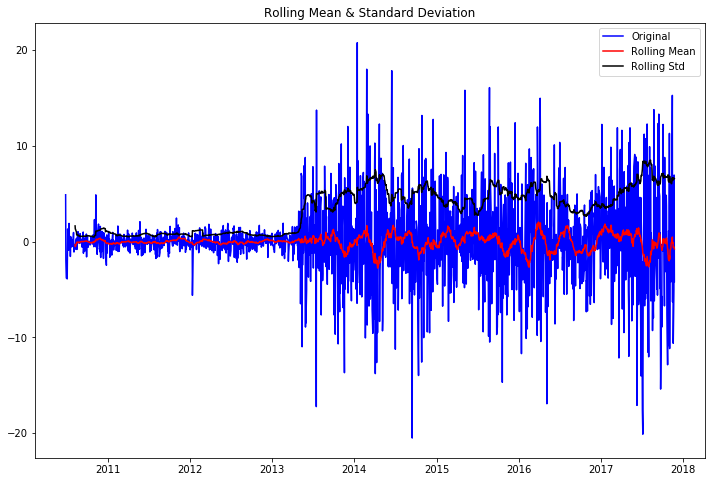

Results of Dickey-Fuller Test:
Test Statistic                  -43.431033
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1865.000000
Critical Value (1%)              -3.433861
Critical Value (5%)              -2.863091
Critical Value (10%)             -2.567596
dtype: float64


In [49]:
 test_stationarity(stock.daily_gain.dropna(inplace=False))

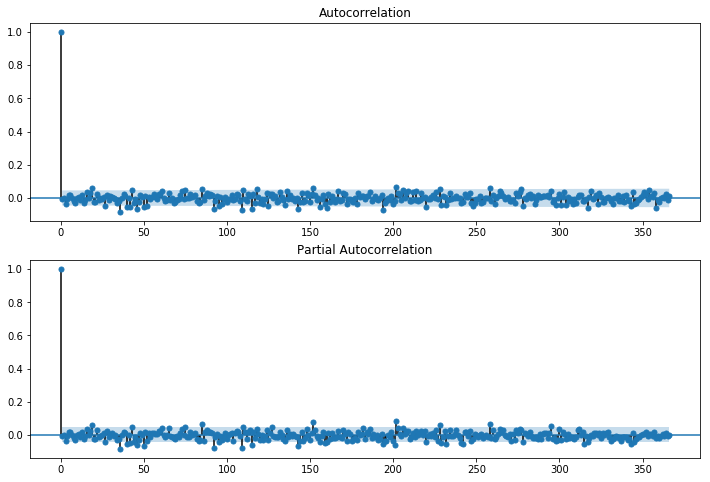

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock.daily_gain, lags=366, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock.daily_gain, lags=366, ax=ax2)
plt.show()

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


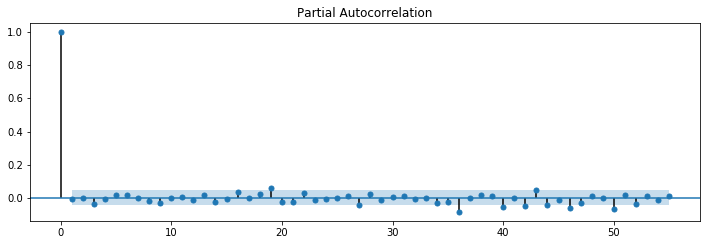

In [15]:
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock.daily_gain, lags=55, ax=ax2)
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  import sys


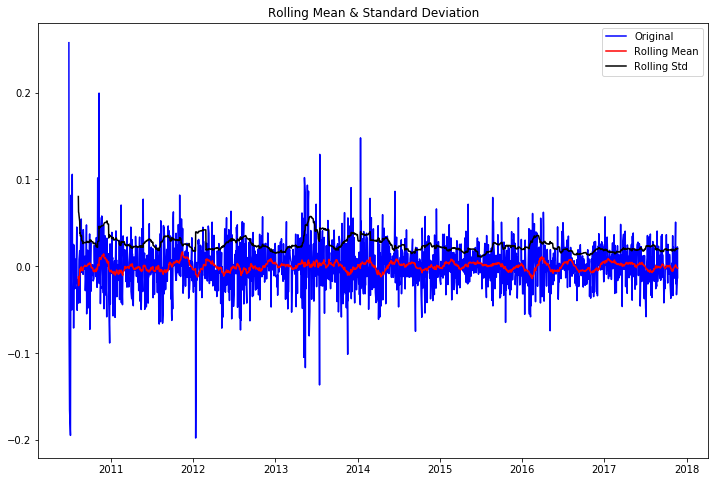

Results of Dickey-Fuller Test:
Test Statistic                  -43.465608
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1865.000000
Critical Value (1%)              -3.433861
Critical Value (5%)              -2.863091
Critical Value (10%)             -2.567596
dtype: float64


In [50]:
test_stationarity(stock.daily_change.dropna(inplace=False))

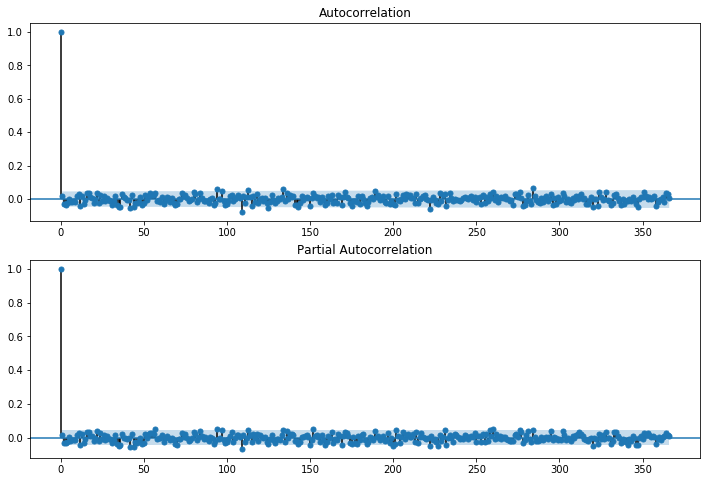

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock.daily_change, lags=366, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock.daily_change, lags=366, ax=ax2)
plt.show()

In [ ]:
stock['target'] = stock.daily_gain.shift(-1)
stock.head()

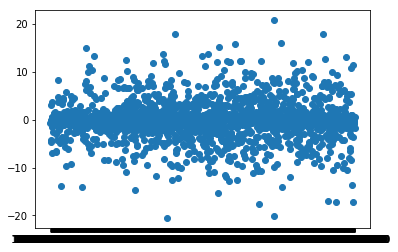

In [38]:
plt.scatter(stock.volume, stock.target)
plt.show()

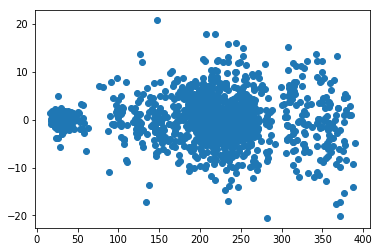

In [37]:
plt.scatter(stock.high, stock.target)
plt.show()

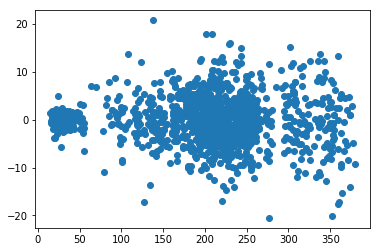

In [39]:
plt.scatter(stock.low, stock.target)
plt.show()

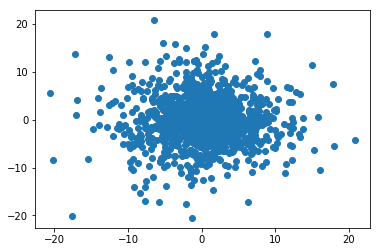

In [40]:
plt.scatter(stock.daily_gain, stock.target)
plt.show()

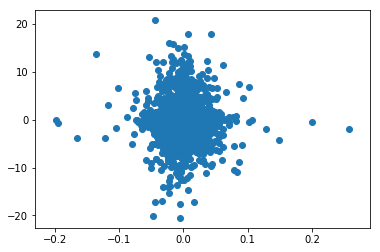

In [41]:
plt.scatter(stock.daily_change, stock.target)
plt.show()

# Thoughts on EDA for Daily Change

By looking at either the daily change between openning bell and closing bell or the percentage increase of that change, we appear to remove the time series compenent. There is no noticable seasonal component or autocorrelation in these features. The rolling means and standard deviations do show some of the overall trends we are able to see in the actual price. We could attempt to use our news/social media data to attempt to predict this change and see if there is any relationship there.  We could also aggrigate (via rolling means) to attempt to predict the overall trend.